In [1]:
import os
import glob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import functools as ft
import operator as op

In [2]:
os.chdir('/Users/sheg/Documents/projects/anki-flashcards/japanese/data')

# Загружаем слова

In [3]:
vocab_files = glob.glob('jlpt/*vocab.csv')
vocab_files.sort(reverse=True)

In [4]:
df = pd.DataFrame()

In [5]:
for file_name in vocab_files:
    jlpt = re.search('jlpt-n(\d+?)-vocab', file_name).group(1)
    jlpt = int(jlpt)
    
    with open(file_name) as file:
        tmp = pd.read_csv(file)
        tmp['jlpt'] = jlpt
        df = pd.concat([df, tmp])

del tmp, jlpt

In [6]:
df.reset_index(inplace=True, drop=True)

In [7]:
df.columns = df.columns.str.lower()
df.rename(columns={'english': 'en'}, inplace=True)

In [8]:
vocab = df
del df

In [9]:
vocab.jlpt = pd.Categorical(vocab.jlpt, categories=[5, 4, 3, 2, 1])

In [10]:
vocab.en.replace({r'(\w),(\w)': r'\1, \2', ';\s*': '\n'}, regex=True, inplace=True)

In [11]:
vocab.to_pickle('vocab.pkl')

# Частотный список слов

In [12]:
freq = pd.read_csv('word_freq_list.csv', squeeze=True, header=None, index_col=0)

In [13]:
freq = pd.Series(np.arange(len(freq)), index=freq.index)

In [14]:
freq = freq[~freq.index.duplicated()]

In [15]:
def freq_rate(row):
    try:
        kanji = freq[row.kanji]
    except:
        pass
    
    try:    
        kana = freq[row.kana]
    except:
        pass
    
    try:
        return min(kana, kanji)
    except:
        pass
    
    try:
        return kana
    except:
        pass
    
    try:
        return kanji
    except:
        pass
    
    return np.nan

In [16]:
vocab['freq'] = vocab.apply(freq_rate, axis=1).astype('Int16')

In [17]:
vocab.sort_values(['jlpt', 'freq'], inplace=True)

In [18]:
vocab.to_pickle('vocab.pkl')

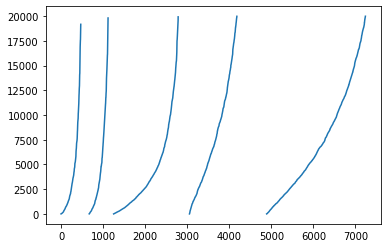

In [19]:
plt.plot(list(vocab.freq))
plt.show()